In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [76]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [77]:
df['Age_original'] = df['Age']


Convert categorical variables (Geography, Gender, Card Type) into numbers.

In [78]:
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

Normalize Numerical Features

In [79]:
# Normalizing the Numerical Features(standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['CreditScore','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [80]:
X= df.drop('Exited', axis=1)
y= df['Exited']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ML model

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
print(' l r score: ', accuracy_score (y_test, predictions))

 l r score:  0.999


C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Influencial features

In [83]:
#Features affecting the churn rate
influential = np.abs(lr_model.coef_[0])  # Get the absolute values of the coefficients
feature_names = X.columns
sorted_features = sorted(zip(influential, feature_names), reverse=True)

for score, name in sorted_features:
    print(f"{name}: {score:.4f}")


Complain: 11.1444
IsActiveMember: 1.5728
Gender_Male: 1.0908
HasCrCard: 0.7446
Card Type_PLATINUM: 0.5191
Card Type_GOLD: 0.4407
Card Type_SILVER: 0.3973
Balance: 0.3535
NumOfProducts: 0.2924
Satisfaction Score: 0.2664
Geography_Spain: 0.2581
Geography_Germany: 0.2067
EstimatedSalary: 0.0688
Tenure: 0.0564
CreditScore: 0.0050
Age_original: 0.0034
Age: 0.0034
Point Earned: 0.0026


Churn Rate Distribution

C:\Users\John\AppData\Local\Temp\ipykernel_6848\2557584123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'], palette="coolwarm")


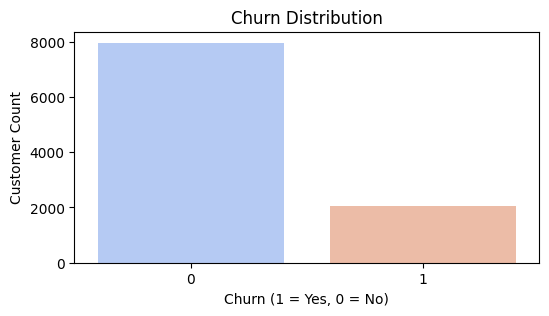

In [84]:
import seaborn as sns

# Plot churn distribution
plt.figure(figsize=(6,3))
sns.countplot(x=df['Exited'], palette="coolwarm")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Customer Count")
plt.title("Churn Distribution")
plt.show()

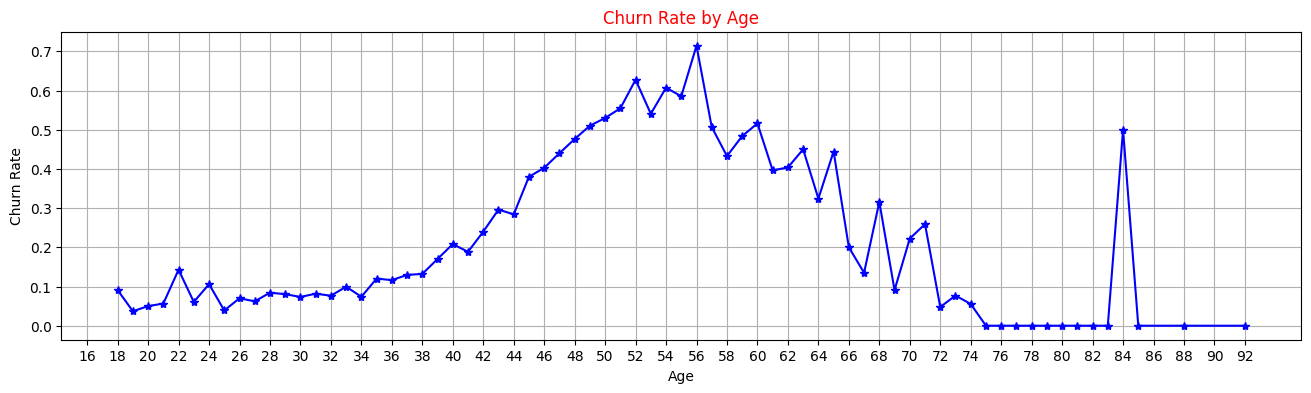

In [101]:
churn_by_age = df.groupby('Age')['Exited'].mean()

plt.figure(figsize=(16,4))
plt.plot(churn_by_age.index, churn_by_age.values, marker='*', linestyle='-', color='b')
plt.xlabel("Age")
plt.ylabel("Churn Rate")
plt.xticks(np.arange(16, 94, 2))
plt.title("Churn Rate by Age", color='r')
plt.grid()
plt.show()

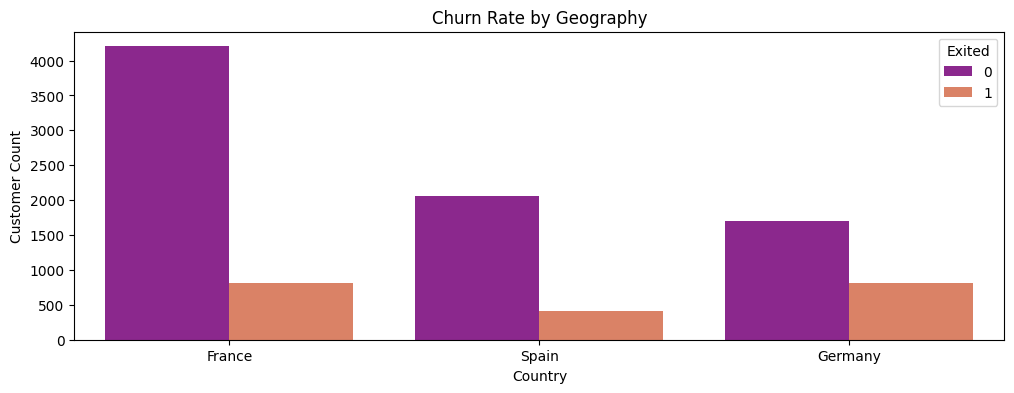

In [117]:
# Load the dataset
df_original = pd.read_csv("Customer-Churn-Records.csv")

# Plot churn by Geography using the original DataFrame

plt.figure(figsize=(12,4))
sns.countplot(x="Geography", hue="Exited", data=df_original, palette="plasma")
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.title("Churn Rate by Geography")
plt.show()

NOTE
1 - churned , 0 - not churned/retained

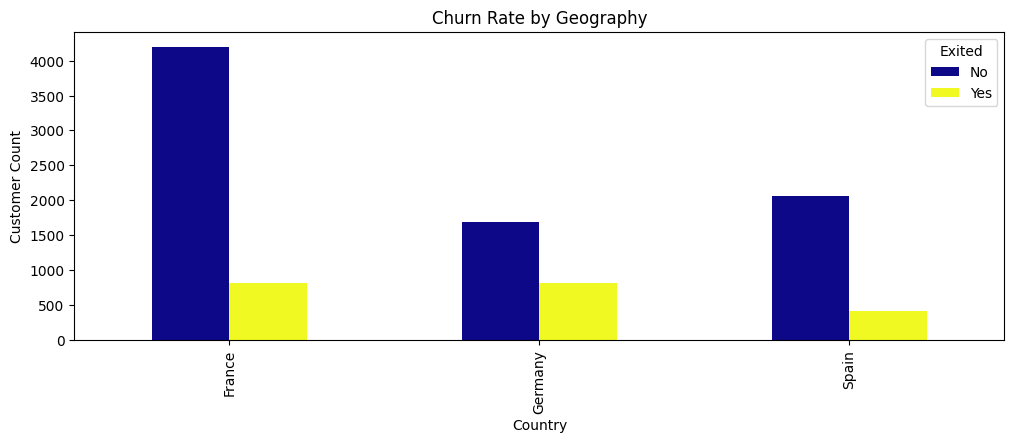

In [119]:
grouped_data = df_original.groupby(['Geography', 'Exited']).size().unstack()

# Plotting the bar graph
grouped_data.plot(kind='bar', figsize=(12, 4), colormap='plasma')
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.title("Churn Rate by Geography")
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()